In [1]:
import helper
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import librosa
import IPython.display as ipd

In [2]:
df = pd.read_csv("../data_classes_length_no_loop.csv", header=None)

In [3]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [4]:
df["length"] = pd.to_numeric(df["length"], downcast="float")

In [5]:
df.head()

,name,class,length
1,!paccpack/cool fxs/a fill from me.wav,f,0.600000
2,!paccpack/cool fxs/beepbeep.wav,f,0.679365
3,!paccpack/cool fxs/buzz.wav,f,3.692336
4,!paccpack/cool fxs/crowd.wav,f,12.923084
5,!paccpack/cool fxs/dowwwwwwwwwwwwn.wav,f,0.612517


In [6]:
snares = df[df["class"] == "s"]
snares

,name,class,length
36,!paccpack/snares rims and claps/clapish rim.wav,s,0.095601
37,!paccpack/snares rims and claps/cool clap.wav,s,0.149751
38,!paccpack/snares rims and claps/cool rim.wav,s,0.046077
39,!paccpack/snares rims and claps/crowded clap.wav,s,1.850975
40,!paccpack/snares rims and claps/definitely the...,s,0.110431
...,...,...,...
16506,tices - 95 SPORT DRUMKIT - volume 1/snares/ult...,s,0.218776
16507,tices - 95 SPORT DRUMKIT - volume 1/snares/upp...,s,0.410703
16508,tices - 95 SPORT DRUMKIT - volume 1/snares/zaz...,s,0.330385
16509,tices - 95 SPORT DRUMKIT - volume 1/snares/zlo...,s,0.206939


In [7]:
snares_long = snares[snares["length"] >= 5]
snares_long

,name,class,length
319,AP11 Sample Pack vol.2/Snare n Clap/AP11 Snare...,s,6.730023
1783,All about music/Samplephonics Free Welcome Pac...,s,7.741950
4390,BLVC SVND DRUM KIT/SNARES AND CLAPS/feelin mys...,s,135.834473
4391,BLVC SVND DRUM KIT/SNARES AND CLAPS/lovey snar...,s,8.648663
4393,BLVC SVND DRUM KIT/SNARES AND CLAPS/november f...,s,20.445534
4394,BLVC SVND DRUM KIT/SNARES AND CLAPS/sadddddd s...,s,19.200001
4811,BeatsGenerals Hit - Boy Premium Drum Kit/Snare...,s,5.665080
5180,Cinetools Hell Drums/_(WAVs)_Drum_Hits/_(WAVs)...,s,15.000000
5224,Cinetools Hell Drums/_(WAVs)_Drum_Hits/_(WAVs)...,s,14.000000
5225,Cinetools Hell Drums/_(WAVs)_Drum_Hits/_(WAVs)...,s,6.000000


In [47]:
filename = snares.iloc[12]["name"]
print(filename)
ipd.Audio("{}/{}".format(helper.directory, filename))

!paccpack/snares rims and claps/light rim.wav


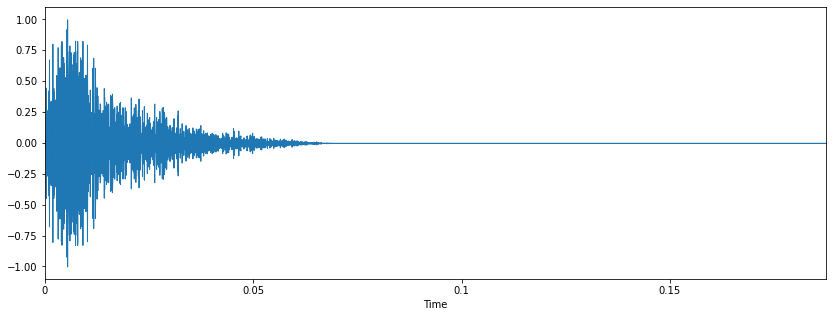

In [48]:
data, sr = librosa.load("{}/{}".format(helper.directory, filename))
data = librosa.util.normalize(data, axis=0)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(data, sr=sr)

In [49]:
onset_times = librosa.onset.onset_detect(data, sr=sr, units="time")
print(onset_times)

[0.06965986]


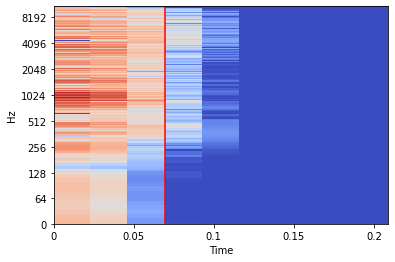

In [50]:
S = librosa.stft(data)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.specshow(logS, sr=sr, y_axis='log', x_axis='time')
for xc in onset_times:
    plt.axvline(x=xc, color="red")